In [405]:
import pandas as pd

df = pd.read_excel('premiums.xlsx')

df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [406]:
df.shape

(50000, 13)

In [407]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [408]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [409]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [410]:
df.dropna(inplace=True)

In [411]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [412]:
df.duplicated().sum()

np.int64(0)

In [413]:
# df.drop_duplicates(inplace=True)

In [414]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [415]:
df[df.number_of_dependants < 0].shape

(72, 13)

In [416]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

In [417]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

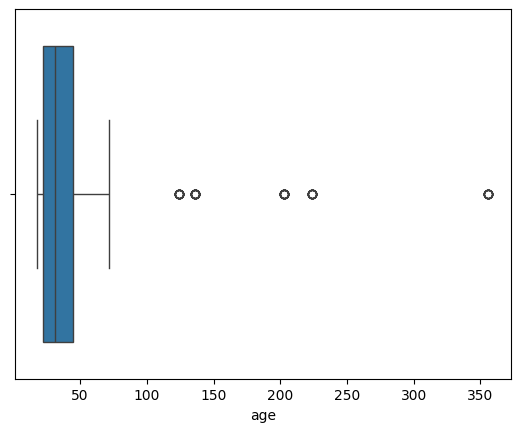

In [418]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.show()

In [419]:
df.select_dtypes(['float64', 'int64']).columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

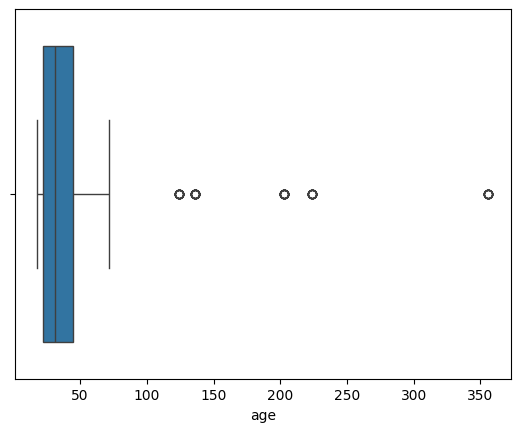

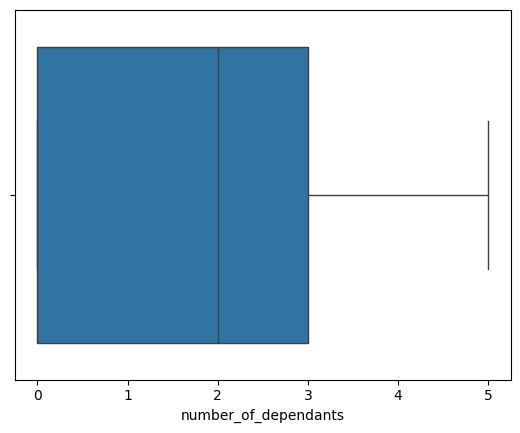

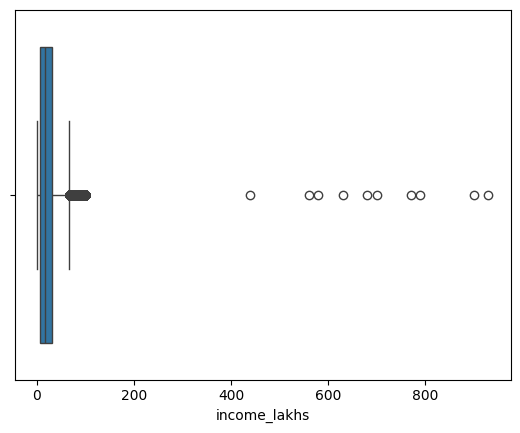

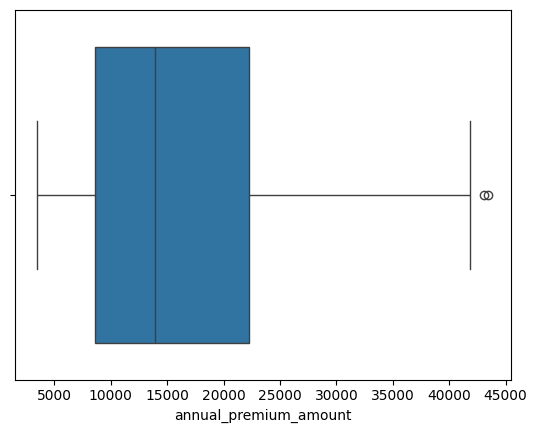

In [420]:
for col in df.select_dtypes(['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [421]:
df[df.age > 100].shape

(58, 13)

In [422]:
df[df.age > 100]['age'].unique()

array([224, 124, 136, 203, 356])

In [423]:
df1 = df[df.age <= 100].copy()

In [424]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

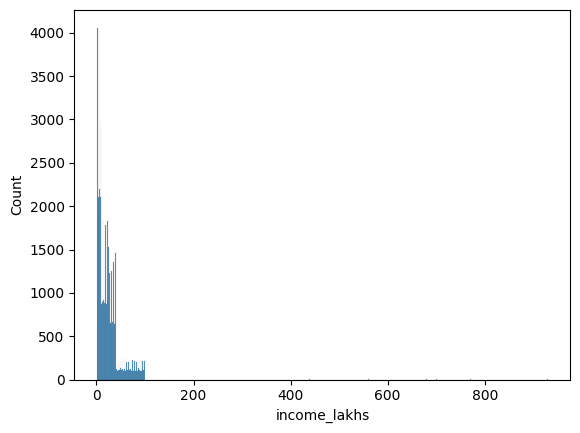

In [425]:
sns.histplot(df1['income_lakhs'])

In [426]:
def get_iqr_bounds(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [427]:
get_iqr_bounds(df1['income_lakhs'])

(-29.0, 67.0)

In [428]:
df1.income_lakhs.quantile(0.999)

np.float64(100.0)

In [429]:
df2 = df1[df1.income_lakhs <= df1.income_lakhs.quantile(0.999)]

In [430]:
df2.shape

(49908, 13)

In [431]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


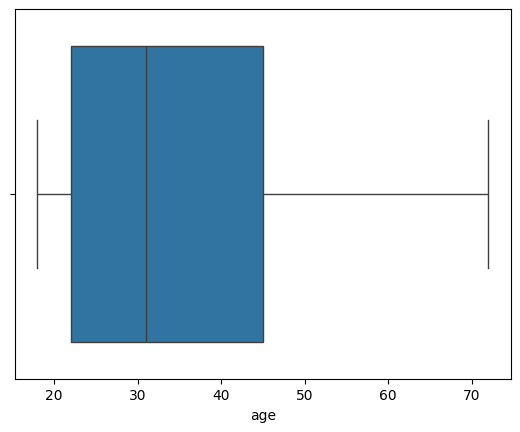

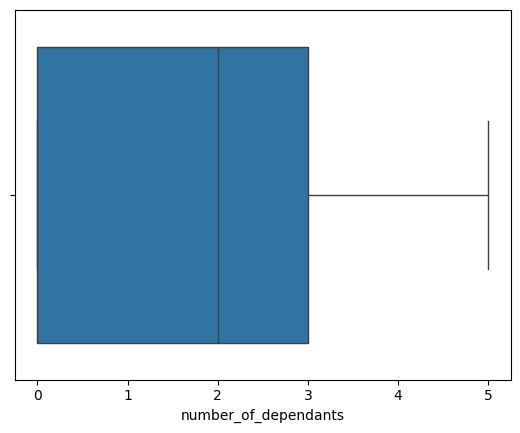

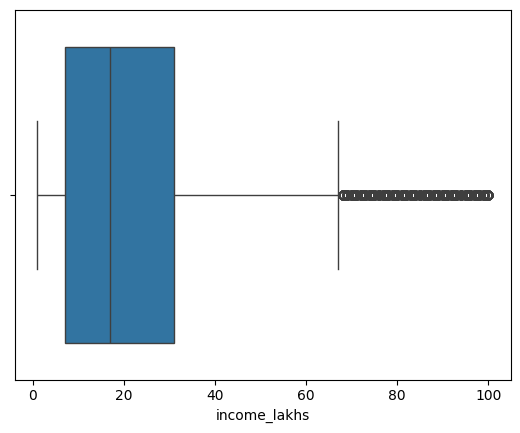

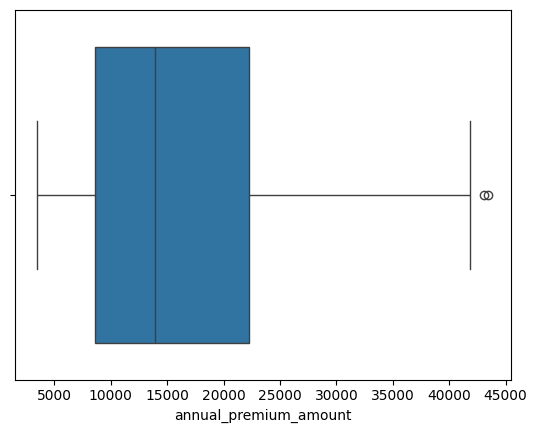

In [432]:
for col in df2.select_dtypes(['float64', 'int64']).columns:
    sns.boxplot(x=df2[col])
    plt.show()

<Axes: xlabel='income_lakhs', ylabel='Count'>

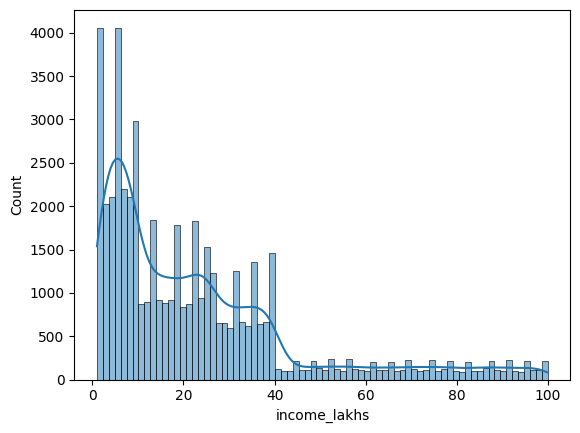

In [433]:
sns.histplot(df2['income_lakhs'], kde=True)

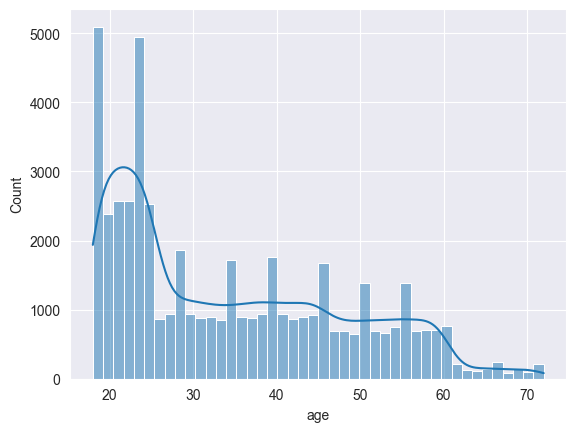

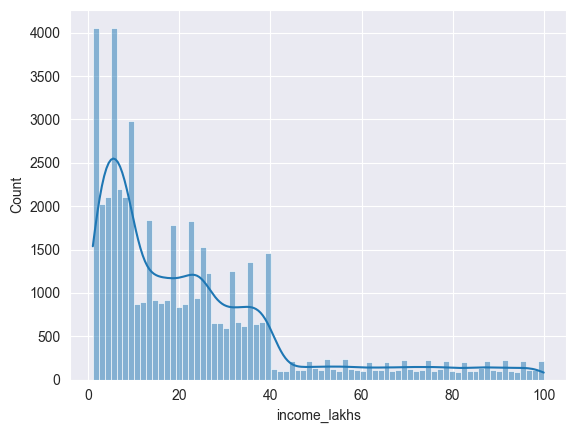

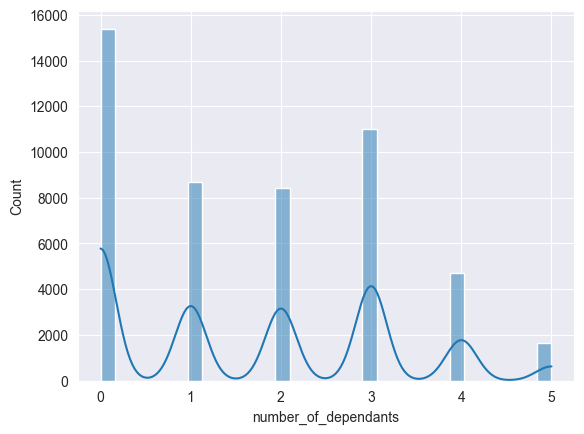

In [502]:
numerical_columns = ['age', 'income_lakhs', 'number_of_dependants']

for col in numerical_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

In [435]:
categorical_columns = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'insurance_plan', 'medical_history', 'income_level', 'employment_status']

for col in categorical_columns:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
insurance_plan : ['Bronze' 'Silver' 'Gold']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']


In [436]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking', 'Does Not Smoker': 'No Smoking', 'Not Smoking': 'No Smoking', 'Does Not Smoke': 'No Smoking'
},inplace=True)


/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/785223207.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/785223207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smoking_status'].replace({


In [437]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

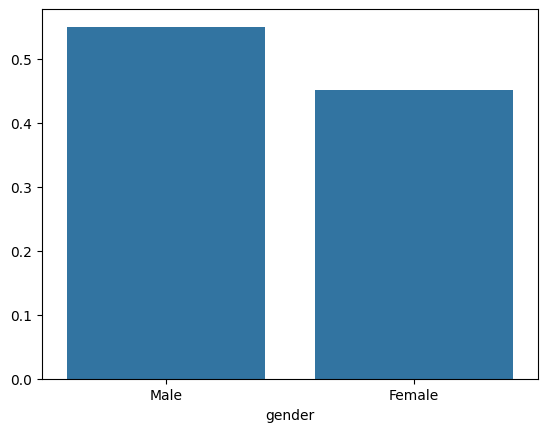

In [438]:
pct_count = df2.gender.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

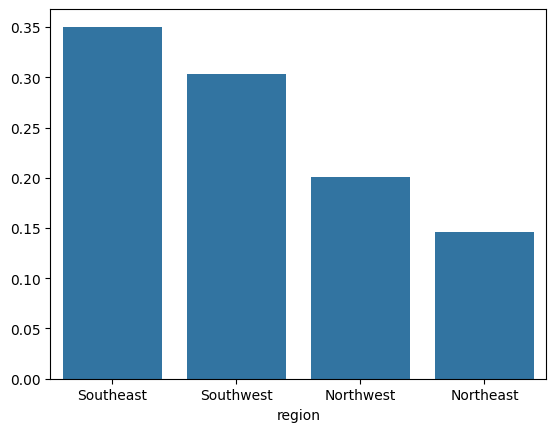

In [439]:
pct_count = df2.region.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

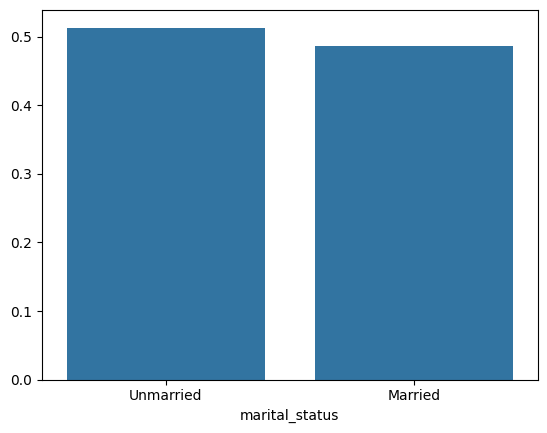

In [440]:
pct_count = df2.marital_status.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

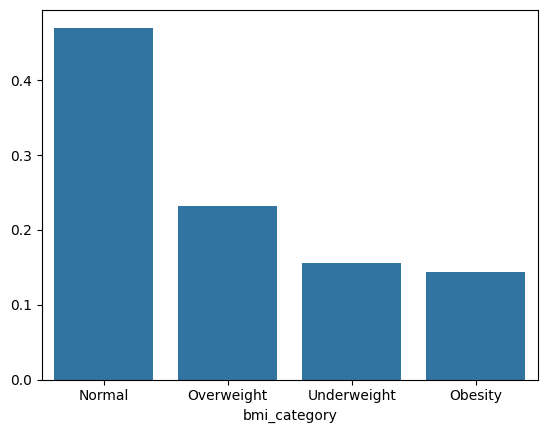

In [441]:
pct_count = df2.bmi_category.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

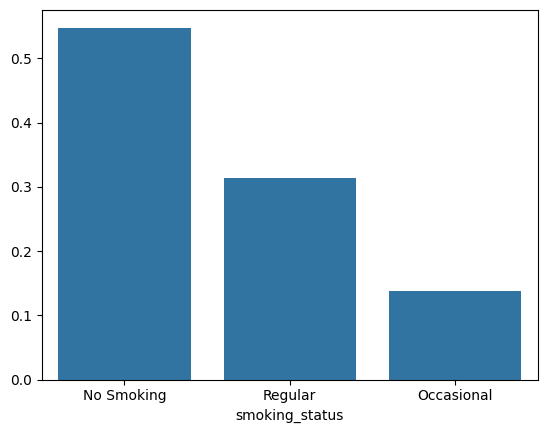

In [442]:
pct_count = df2.smoking_status.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

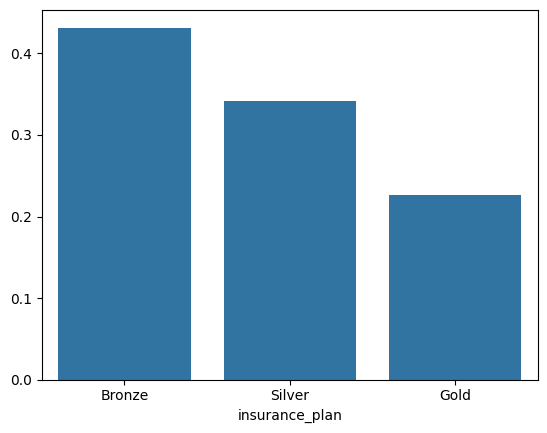

In [443]:
pct_count = df2.insurance_plan.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

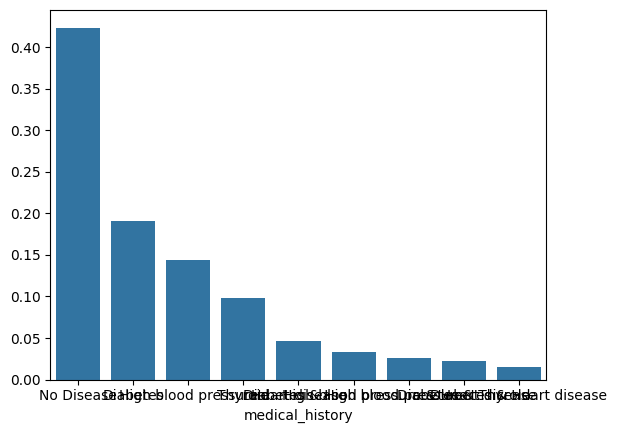

In [444]:
pct_count = df2.medical_history.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

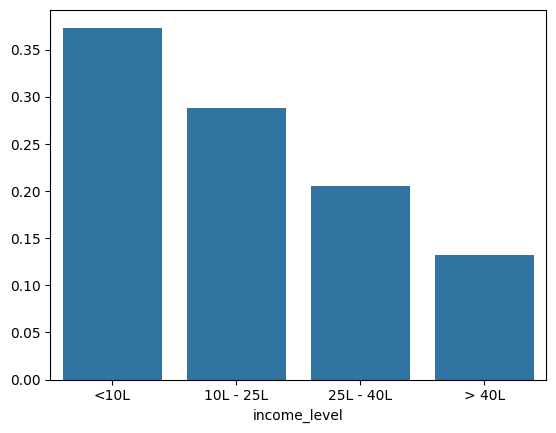

In [445]:
pct_count = df2.income_level.value_counts(normalize=True)

sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

In [446]:
cross_tab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


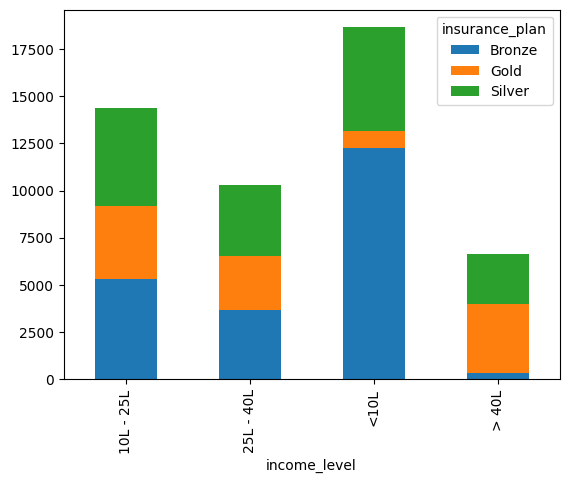

In [447]:
cross_tab.plot(kind='bar', stacked=True)
plt.show()

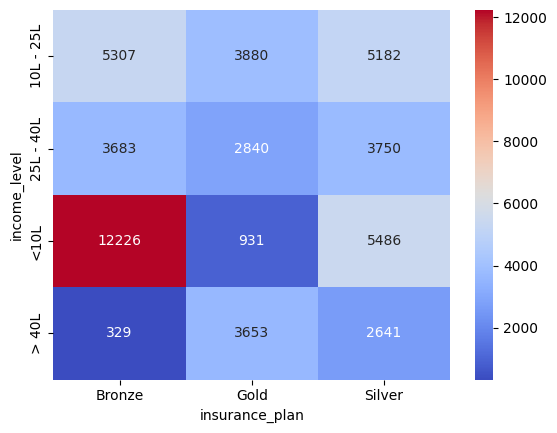

In [448]:
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.show()

In [449]:
### Feature Engineering

In [450]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [451]:
risk_score = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [452]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.head()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/3361658601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/3361658601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None


In [453]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/3883420476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/3883420476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['disease1'].fillna('none', inplace=True)

In [454]:
df2['total_risk_score'] = 0

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/330273375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] = 0


In [455]:
for col in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[col].map(risk_score)

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/739776020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] += df2[col].map(risk_score)
/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/739776020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_risk_score'] += df2[col].map(risk_score)


In [456]:
max_score = df2.total_risk_score.max()
min_score = df2.total_risk_score.min()

df2['normalized_risk_score'] = (df2.total_risk_score - min_score) / (max_score - min_score)
df2.head()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/1630640237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized_risk_score'] = (df2.total_risk_score - min_score) / (max_score - min_score)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [457]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [458]:
df2['insurance_plan'] = df2['insurance_plan'].map({
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
})
df2.insurance_plan.unique()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/2280062988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['insurance_plan'] = df2['insurance_plan'].map({


array([1, 2, 3])

In [459]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [460]:
df2['income_level'] = df2['income_level'].map({
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4
})
df2.income_level.unique()

/var/folders/_b/p97r09qs6zs2rwlzfw60c52r0000gn/T/ipykernel_97191/3200946803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income_level'] = df2['income_level'].map({


array([1, 2, 4, 3])

In [461]:
normalize_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=normalize_cols, drop_first=True, dtype=int)

df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [462]:
df4 = df3.drop(columns=['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


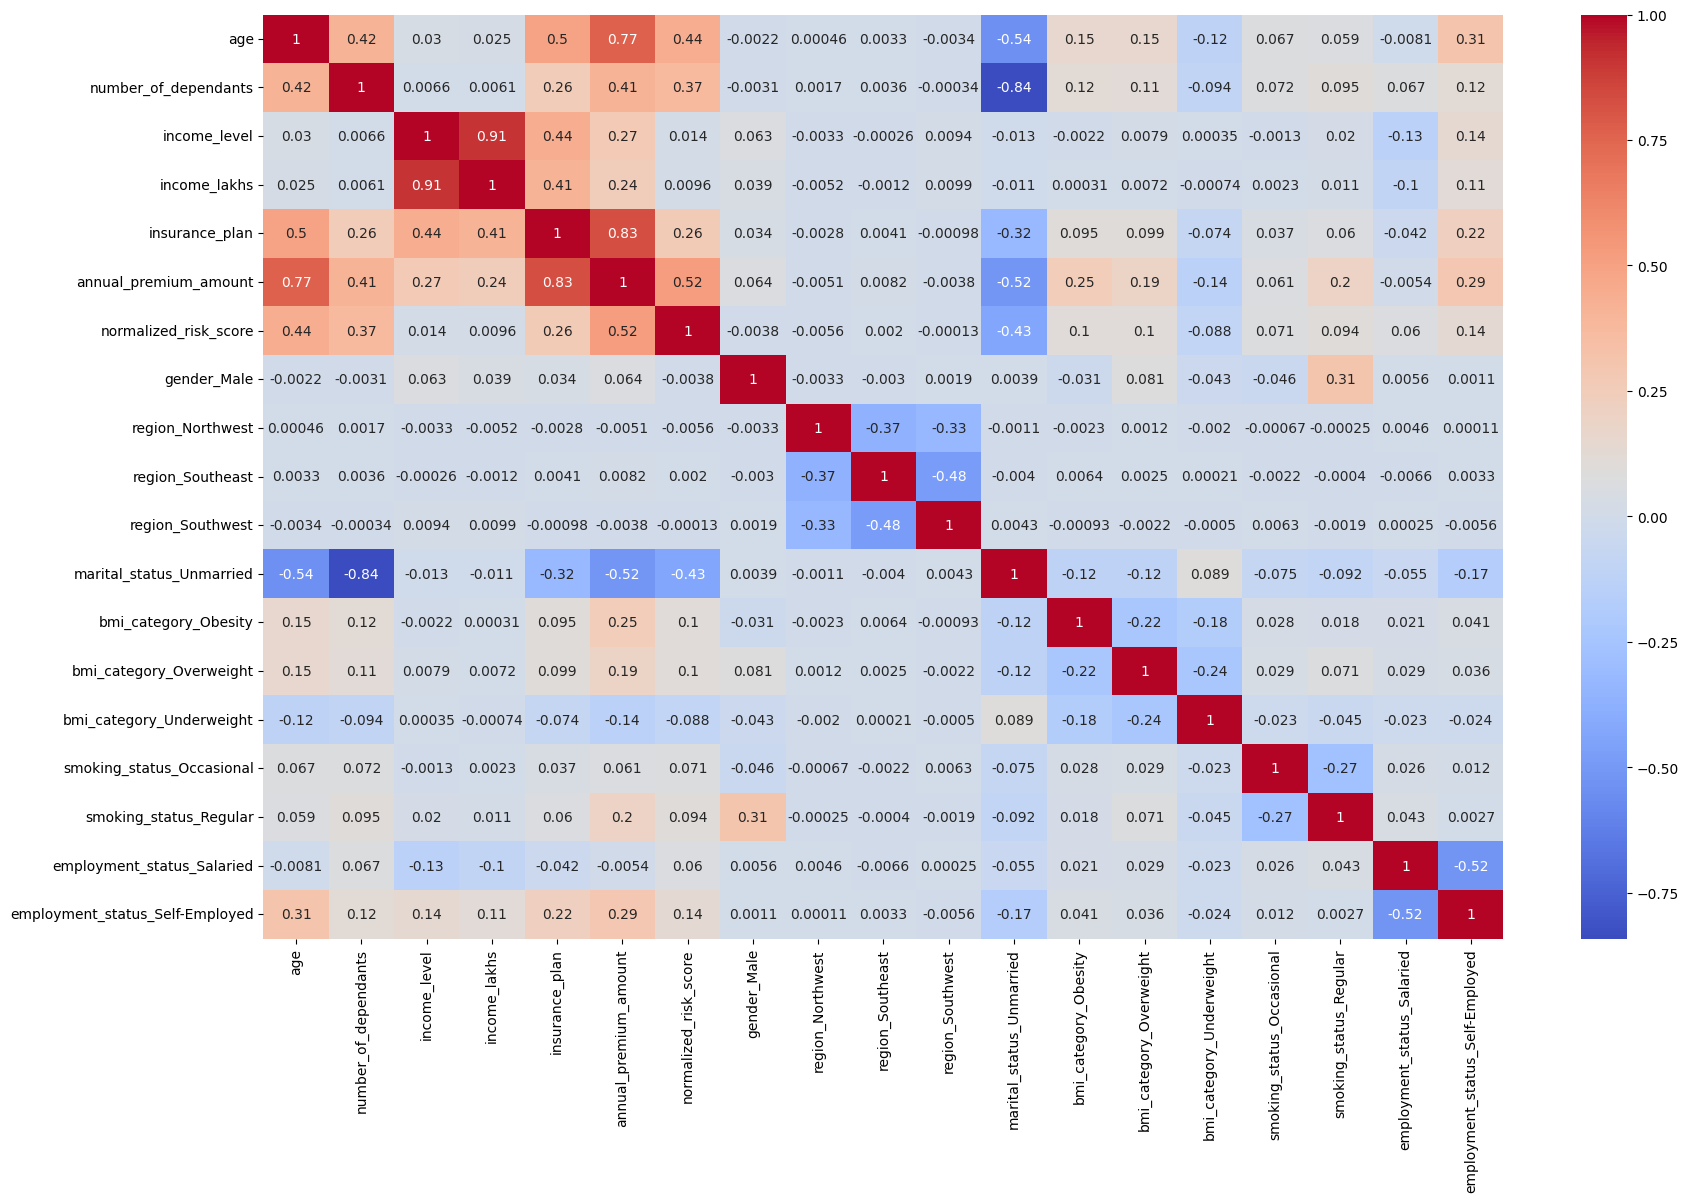

In [463]:
cm = df4.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [464]:
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [465]:
X = df4.drop(columns='annual_premium_amount')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age', 'number_of_dependants', 'income_level' ,'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [466]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Column'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [467]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [468]:
X.drop(columns=['income_level'], axis='columns')
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [469]:
X_reduced = X.drop('income_level', axis='columns')

In [470]:
### Model Training

In [471]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

X_train.shape, X_test.shape

((34935, 17), (14973, 17))

In [472]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test), model_lr.score(X_train, y_train)

(0.9280547230217837, 0.9282143576916762)

In [473]:
model_lr.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

In [474]:
model_lr.intercept_

np.float64(4824.300272127111)

In [475]:
feature_importances = model_lr.coef_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X_train.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

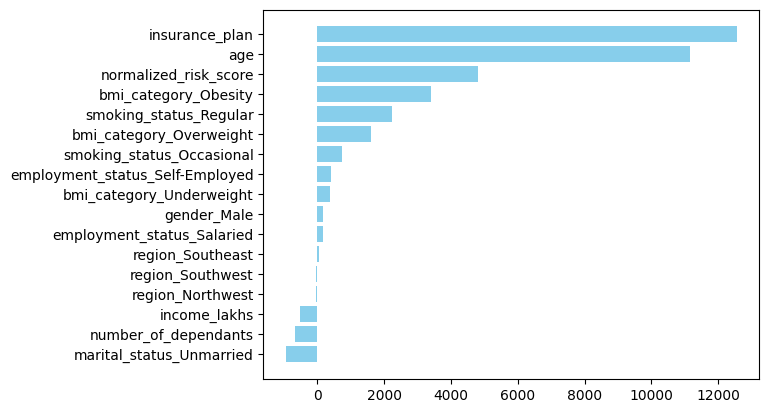

In [476]:
plt.barh(coef_df.index, coef_df.Coefficients, color='skyblue')
plt.show()

In [477]:
from sklearn.linear_model import Lasso, Ridge

model_rg = Ridge()
model_rg.fit(X_train, y_train)

model_rg.score(X_test, y_test), model_rg.score(X_train, y_train)

(0.9280541644640349, 0.9282143198366275)

In [478]:
model_ls = Lasso()
model_ls.fit(X_train, y_train)

model_ls.score(X_test, y_test), model_ls.score(X_train, y_train)

(0.9280870828363261, 0.928211327505007)

In [479]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test), model_xgb.score(X_train, y_train)

(0.9809534549713135, 0.9860964417457581)

In [480]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

model_rf.score(X_test, y_test), model_rf.score(X_train, y_train)

(0.9793027649185817, 0.996583258777524)

In [481]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model_xgb, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

(np.float64(0.9817558725674947),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 40})

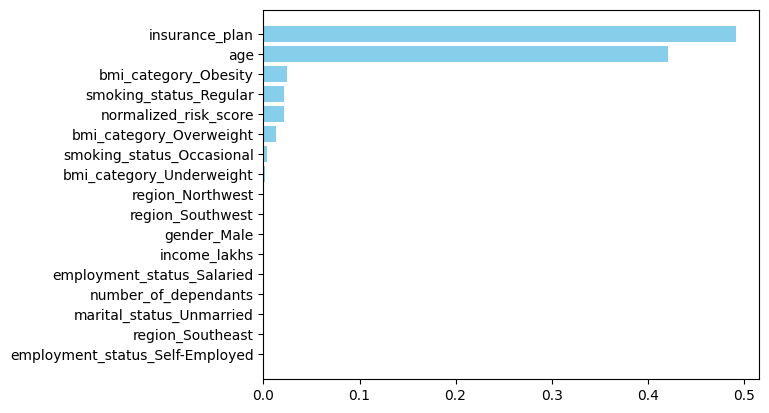

In [482]:
feature_importances = grid_search.best_estimator_.feature_importances_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X_train.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.barh(coef_df.index, coef_df.Coefficients, color='skyblue')
plt.show()

In [483]:
### Model Evaluation | Error Analysis

In [484]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100 / y_test

result_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20576.011719,22.011719,0.107092
35794,29647,29390.083984,-256.916016,-0.866584
43608,20560,20616.943359,56.943359,0.276962
42730,5018,6943.274902,1925.274902,38.367375
18936,8929,7937.507812,-991.492188,-11.104179


<Axes: xlabel='diff_pct', ylabel='Count'>

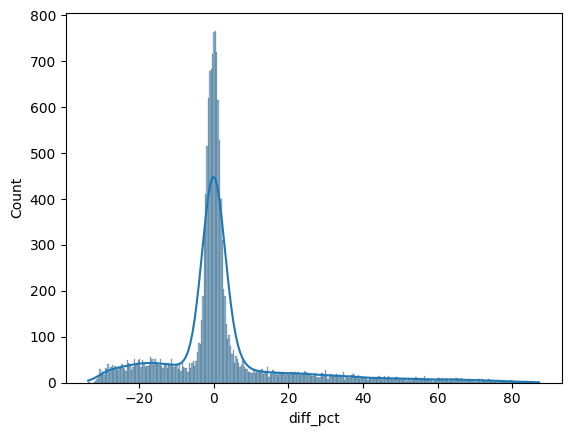

In [485]:
sns.histplot(result_df['diff_pct'], kde=True)

In [486]:
import numpy as np

extreme_error_threshold = 10
extreme_result_df = result_df[np.abs(result_df.diff_pct) > extreme_error_threshold]

extreme_result_df.shape

(4412, 4)

In [487]:
extreme_error_pct = extreme_result_df.shape[0] / result_df.shape[0] * 100
extreme_error_pct

29.46637280438122

In [488]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
18936,0.074074,0.0,0.202020,0.0,0.428571,1,0,0,1,1,0,1,0,0,1,0,1
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0


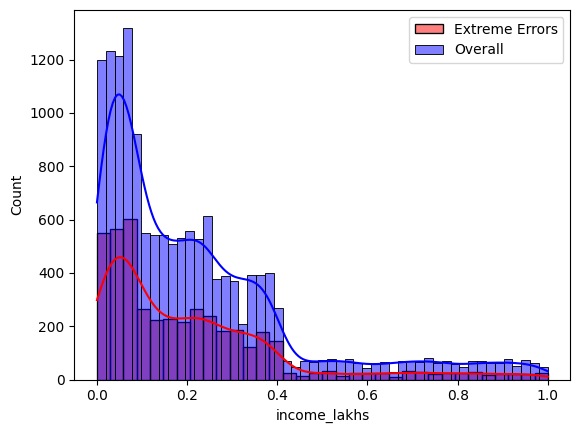

In [492]:
sns.histplot(extreme_errors_df.income_lakhs, kde=True, label='Extreme Errors', color='red')
sns.histplot(X_test.income_lakhs, kde=True, label='Overall', color='blue', alpha=0.5)
plt.legend()
plt.show()

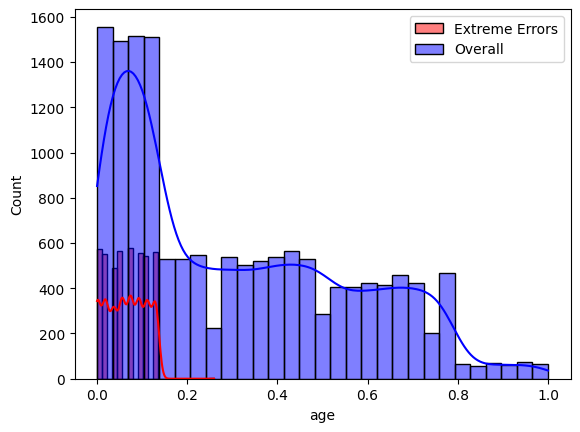

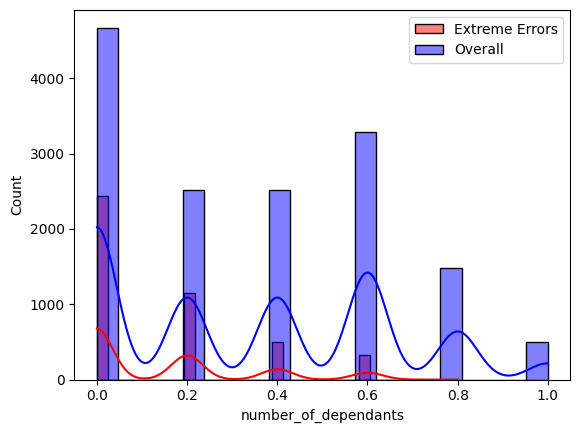

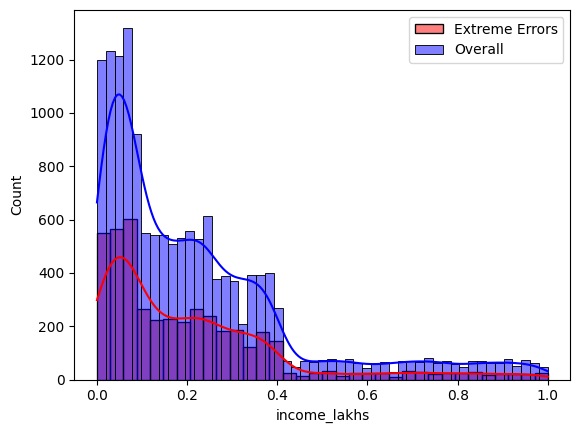

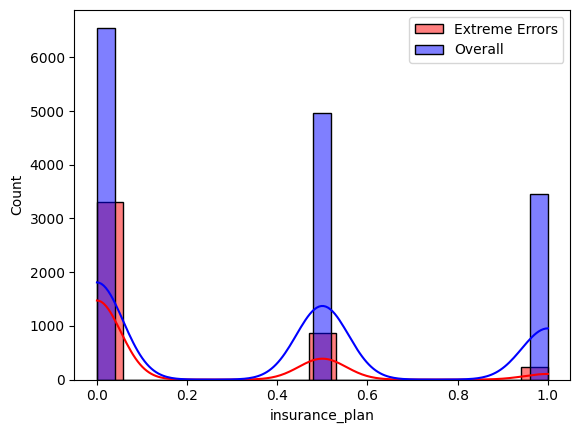

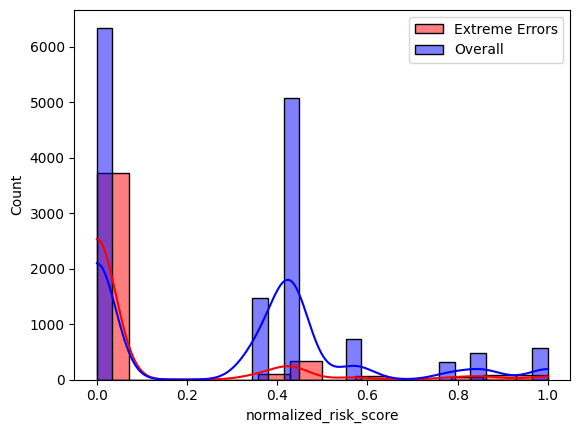

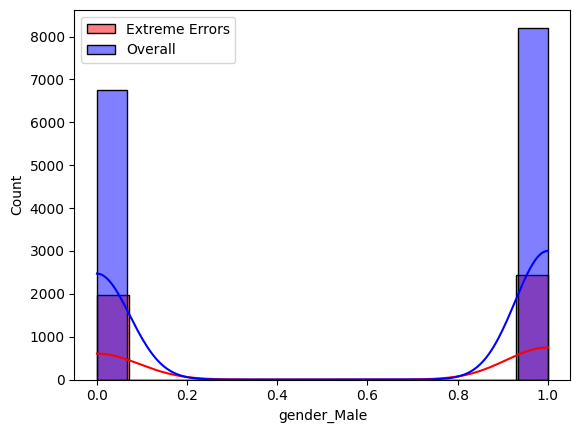

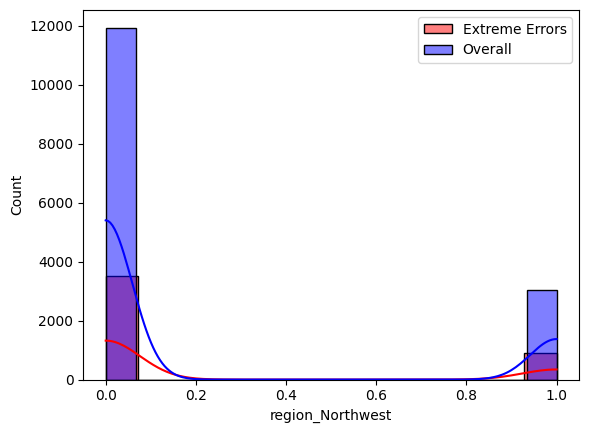

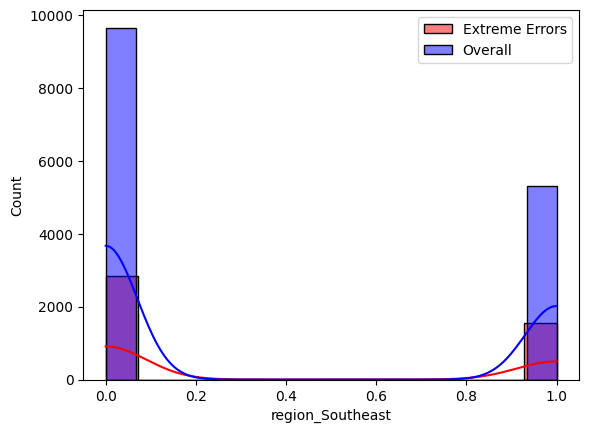

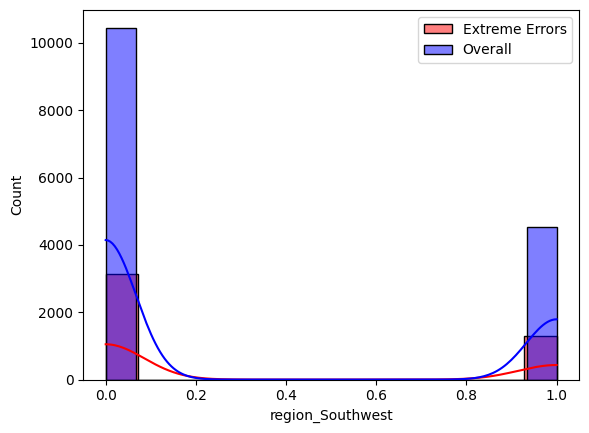

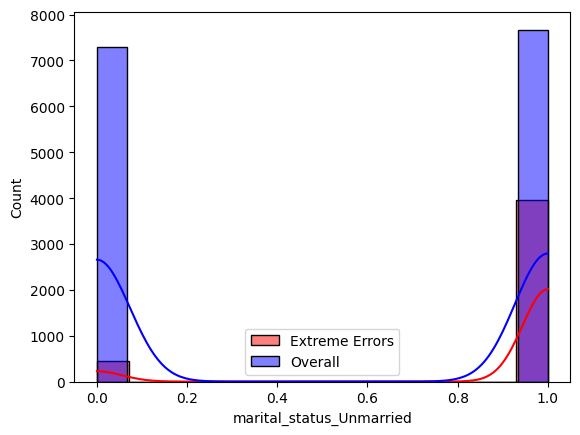

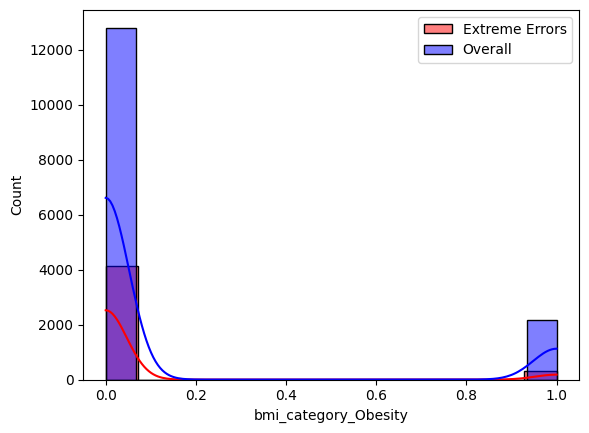

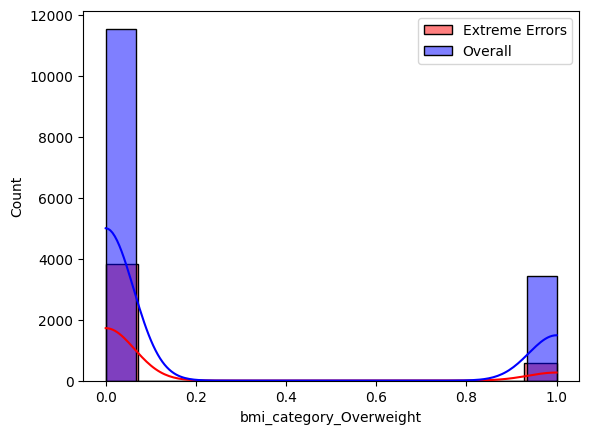

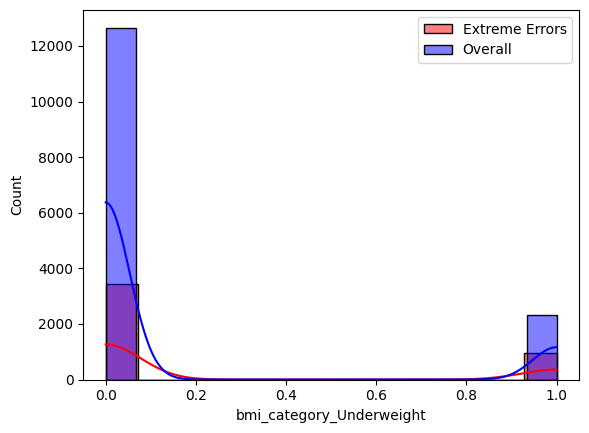

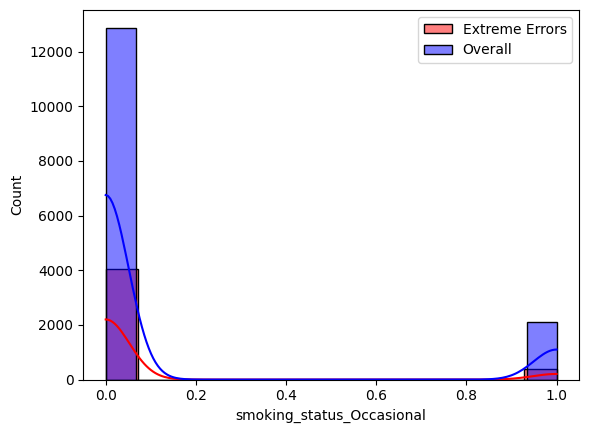

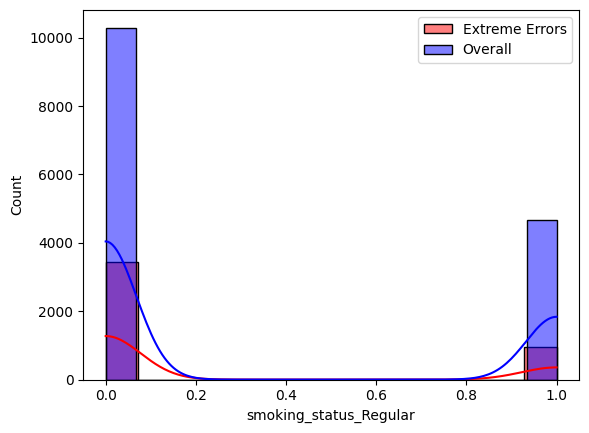

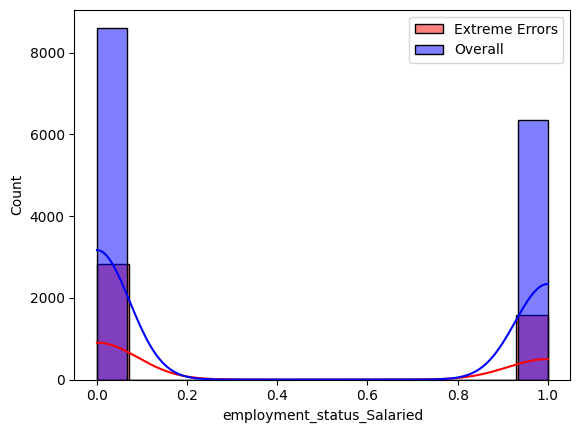

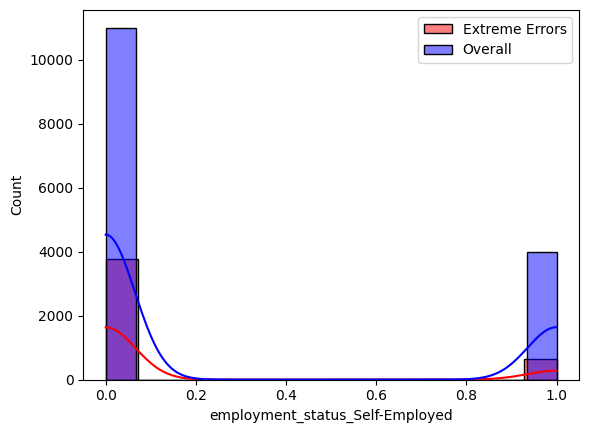

In [493]:
for feature in X_test.columns:
    sns.histplot(extreme_errors_df[feature], kde=True, label='Extreme Errors', color='red')
    sns.histplot(X_test[feature], kde=True, label='Overall', color='blue', alpha=0.5)
    plt.legend()
    plt.show()

In [496]:
col_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [498]:
extreme_errors_df['income_level'] = -1

<Axes: xlabel='age', ylabel='Count'>

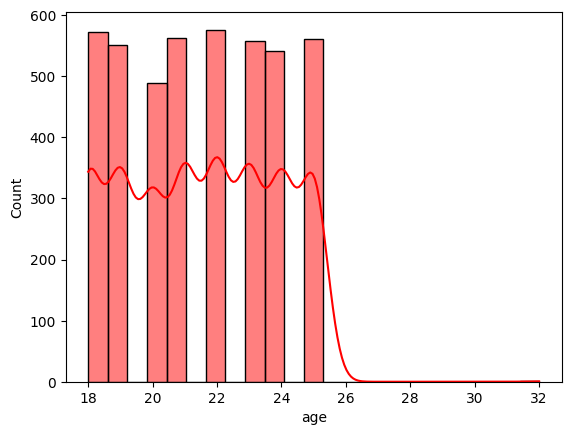

In [500]:
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_errors_df[col_to_scale])

sns.histplot(df_reversed.age, kde=True, label='Extreme Errors', color='red')

In [501]:
df_reversed.age.quantile(0.999)

np.float64(25.0)

In [ ]:
### Model Segmentation